
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automatico**

**Edición 2022**

**Grupo 8**

**Integrantes:**


*   Abdala, Agustin
*   Acosta, Martín
*   Baulina, David
*   Giovine, Carina




---


# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston['DESCR'])   # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

RESPUESTAS

1. Se trata de un dataset de 13 variables categoricas y numéricas más la media de precios,que posee 506 registros con diversas características relacionadas al análisis del precio de zonas residencialesen Boston en función de estas variables

2. El objetivo es predecir el valor de la mediana de precios de una vivienda (variable MEDV - Median value of owner-occupied homes in $1000's) utilizando las características provistas( Lo que hay que predecir es el precio de la vivienda en función de otras variables.)

3. Los siguientes atributos están disponibles en el dataset:


*   CRIM - tasa de criminalidad per cápita por ciudad.
*   ZN - proporción de suelo residencial ocupado para terrenos de más de 25,000 sq.ft. ( 2300m2)
*   INDUS - proporción de hectáreas de negocios no minoristas por ciudad.
*   CHAS - Variable ficticia de Charles  River(=1 si el tramo limita al río; si no=0).
*   NOX - concentración de óxido  nítrico (partes por 10 millones).
*   RM - número medio de habitaciones por vivienda.
*   AGE - proporción de unidades ocupadas por sus propietarios construídas antes de 1940.
*   DIS - distancias ponderadas hasta cinco centros de empleo de Boston.
*   RAD - índice de accesibilidad a autopistas radiales.
*   TAX - tasa de impuesto a la propiedad de valor total de $10000

*   PTRATIO - ratio de alumnos por profesor por ciudad.
*   B funcion= 1000(Bk - 0.63)^2 donde Bk es la proporción de personas [de ascendencia afroamericana] por ciudad.
*   LSTAT - % de estatus inferior de la población.
*   MEDV - valor medio de casas ocupadas por sus propietarios por $1000's


4. Los atributos que se consideran mas determinates para la predicción son:
*   La cantidad promedio de habitaciones por hogar (RM)
*   Ratio alumno maestro por localidad (PTRATIO)
*   Proporcion de acres de negocios no retail por localidad (INDUS)
*   Distancias ponderadas a los 5 centros de empleo de Boston (DIS)


5. El principal problema ético que conlleva el dataset es que los autores del estudio crearon una variable (B)
en donde se segrega racialmente a la población por el color de piel.


        




## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

RESPUESTAS
1. Grafico para cada atributo

In [ ]:
#se puede renombrar la columna MEDV por PRICE
#df.rename(columns={‘medv’:’Price’}, inplace=True)


# se convirte el conjunto de datos en un dataframe de pandas para realizar un análisis exploratorio de los datos
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['MEDV'] = boston.target
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Se trazar la distribución de la variable objetivo (MEDV), a través de un gráfico de histograma

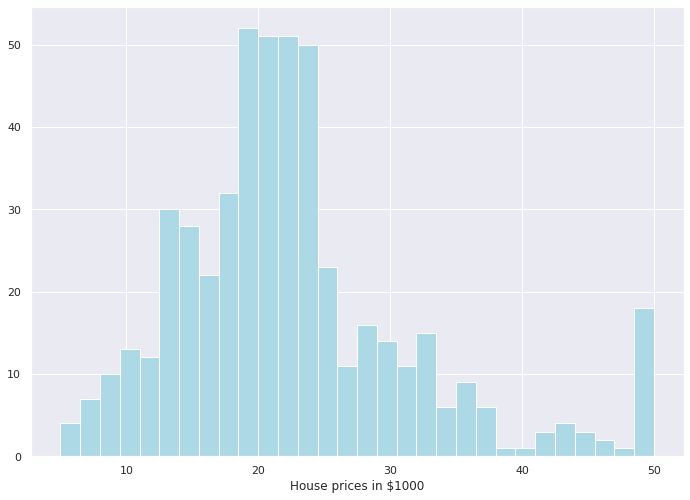

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['MEDV'],color ="lightblue", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [ ]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A través de una matriz de correlación se visualizan las relaciones lineales entre las variables.

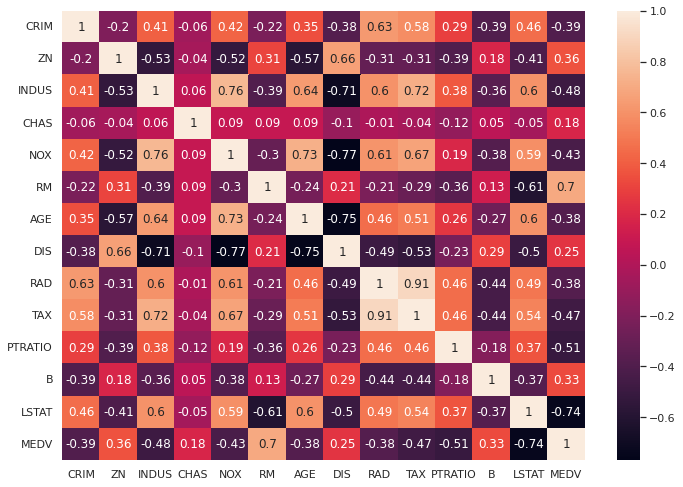

In [ ]:
correlation_matrix=bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

El coeficiente de correlación oscila entre -1 y 1. Si el valor se acerca a 1, significa que existe una fuerte correlación positiva entre las dos variables. Cuando se acerca a -1, las variables tienen una fuerte correlación negativa.

-------------------------------------------------------------------------------------------------------

Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con MEDV (0,7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0,74)

CRIM vs Precio

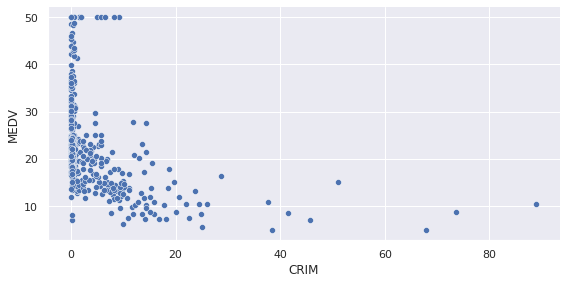

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['CRIM'],
                 aspect=2, height=4)

ZN vs Precio

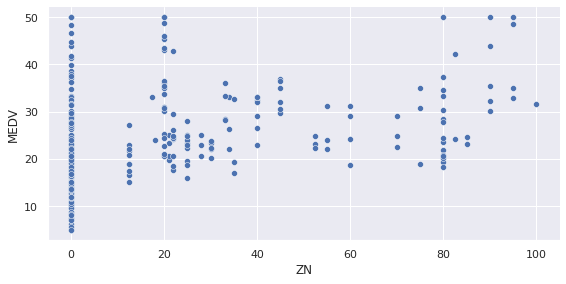

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['ZN'],
                 aspect=2, height=4)

INDUS vs Precio

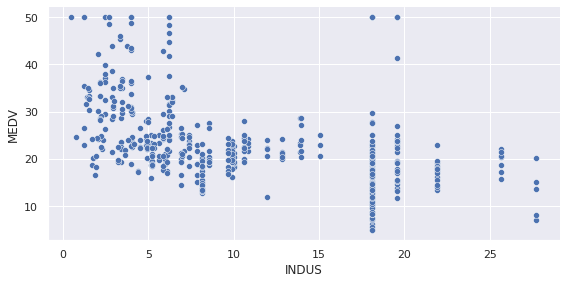

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['INDUS'],
                 aspect=2, height=4)

CHAS vs Precio

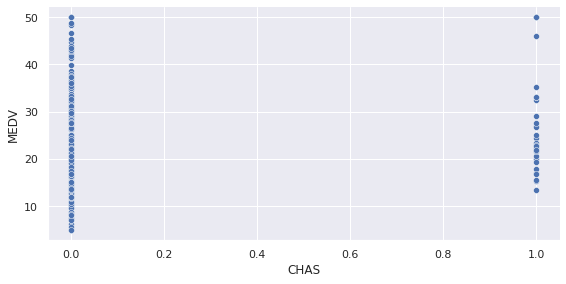

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['CHAS'],
                 aspect=2, height=4)

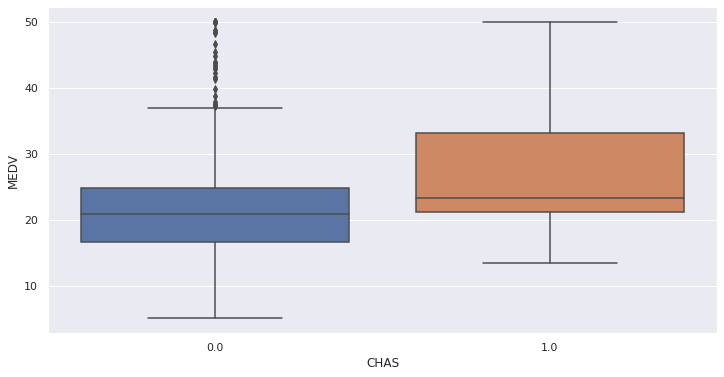

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bos, x='CHAS', y='MEDV')

RM vs Precio

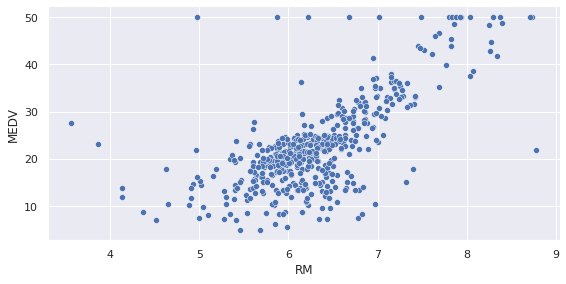

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['RM'],
                 aspect=2, height=4)

AGE vs Precio

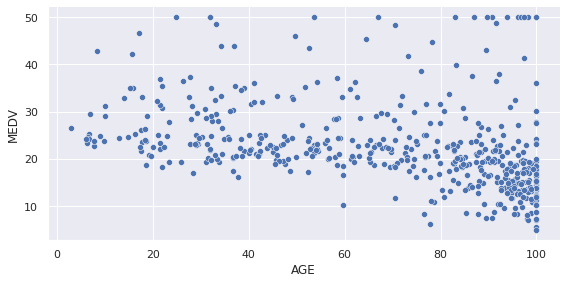

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['AGE'],
                 aspect=2, height=4)

DIS vs Precio

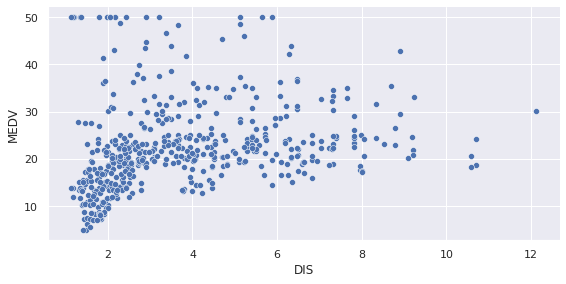

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['DIS'],
                 aspect=2, height=4)

RAD vs Precio

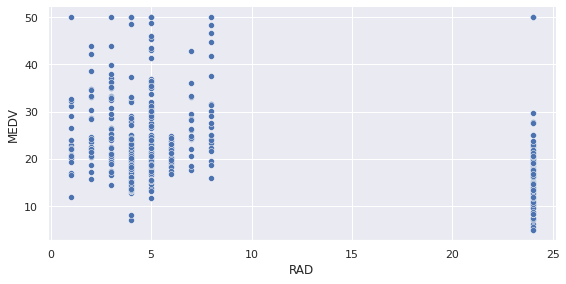

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['RAD'],
                 aspect=2, height=4)

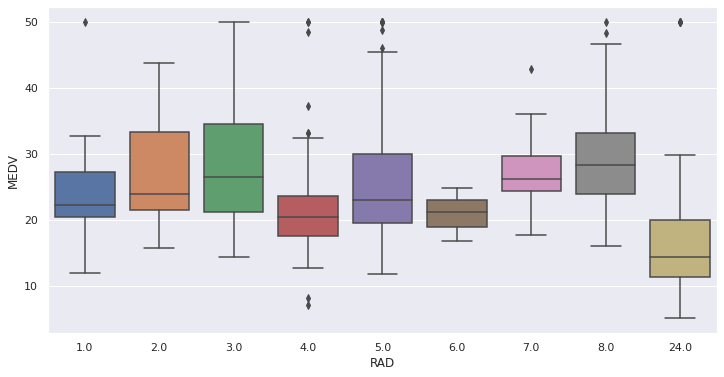

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bos, x='RAD', y='MEDV')

TAX vs Precio

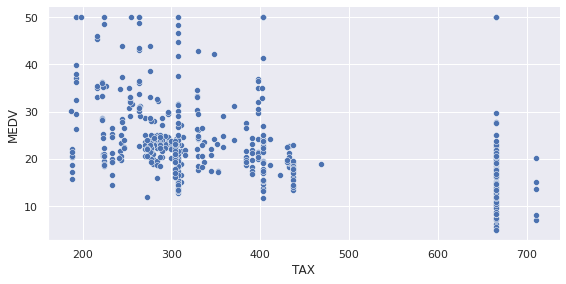

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['TAX'],
                 aspect=2, height=4)

PTRATIO vs Precio

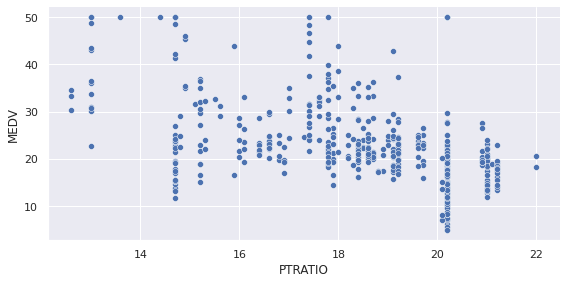

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['PTRATIO'],
                 aspect=2, height=4)

B vs Precio

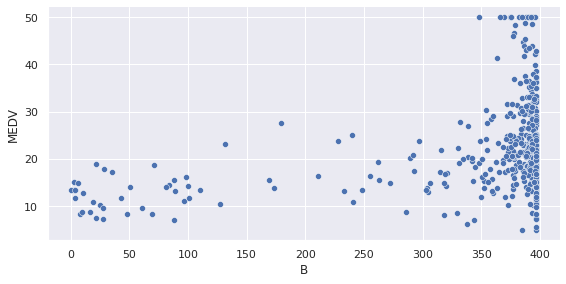

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['B'],
                 aspect=2, height=4)

LSTAT vs Precio

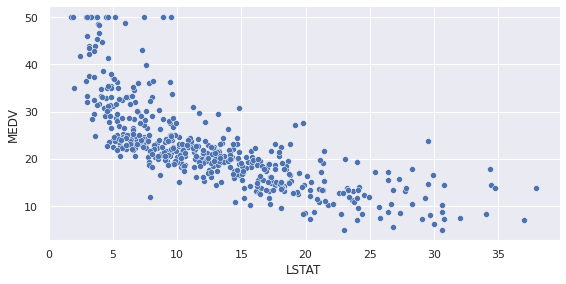

In [ ]:
sns.pairplot(data=bos, y_vars=['MEDV'],
                 x_vars=['LSTAT'],
                 aspect=2, height=4)

2. A simple vista, se observa que las variables que tienen importancia para ka predicción del precio son RM, AGE, DIS, CRIM y LSTAT

3. Atributos para prediccion de precio ordenados por importancia 

*   RM - número medio de habitaciones por vivienda, el precio aumenta con el aumento de la cantidad de habitaciones.
*   DIS - distancias ponderadas hasta cinco centros de empleo de Boston.
*   CRIM - tasa de criminalidad per cápita por ciudad.
*   LSTAT - % de estatus inferior de la población, a medida que este porcentaje disminuye el precio aumenta.  
*   AGE - proporción de unidades ocupadas por sus propietarios construídas antes de 1940.


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 3.1
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
X_train_f =X_train_f.flatten()
X_test_f =X_test_f.flatten()

In [ ]:
X_train_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias
#X_train_bias

In [ ]:
X_train_bias.shape

(404, 2)

In [ ]:
# 2. Instanciar y entrenar acá.

def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
#X_train_bias, y_train

In [ ]:
X_train_f = X_train_f.flatten()
w = linear_least_squares(X_train_f, y_train)
w

array([  9.37638431, -36.47618963])

In [ ]:
# 3. Predecir y evaluar acá.
y_train_pred = f(X_train_f, w)
y_val_pred = f(X_test_f.flatten(), w)

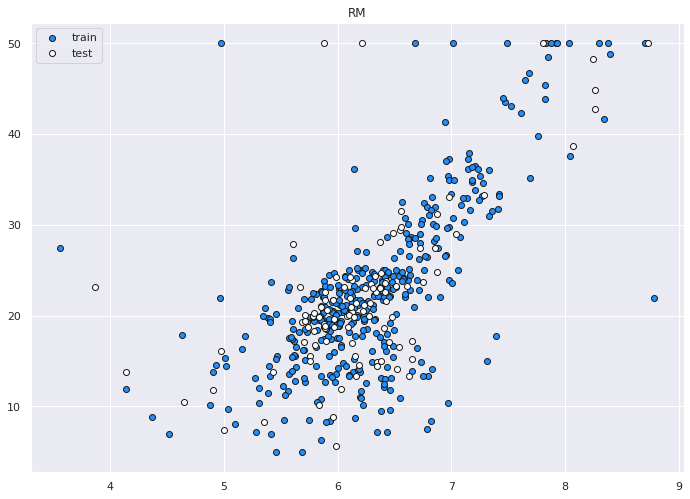

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

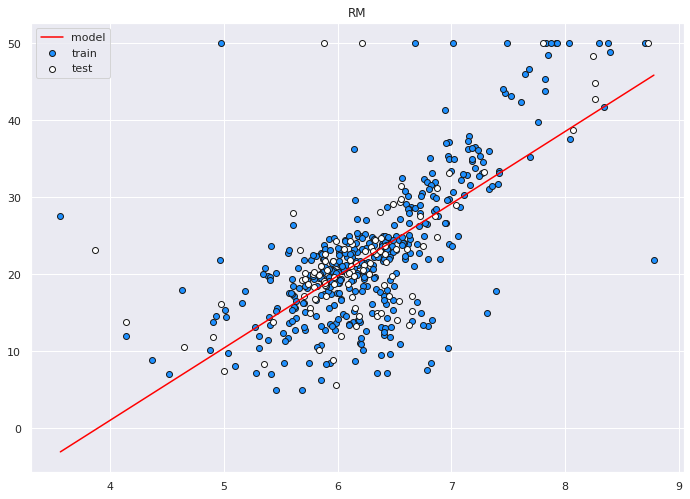

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

# plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.plot(x.flatten(), f(x.flatten(), w), color="red", label="model")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()


In [ ]:
#error cuadratico medio
from sklearn.metrics import mean_squared_error

y_train_pred = f(X_train_f.flatten(), w)
y_val_pred = f(X_test_f.flatten(), w)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 42.820479
Val error: 46.907352


Como se puede ver tanto en el grafico, el metodo de predicción no es muy preciso, esto queda evidenciado en el error cuadratico medio por encima del 40% tanto para la muestra de entrenamiento, como para la de evaluación

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
X_val_f = X_test_f.flatten()
X_train_f = X_train_f.flatten()
X_train_f.shape, X_val_f.shape

((404,), (102,))

In [ ]:
#convertimos en vector
X_train_f = X_train_f.reshape(-1, 1)
X_val_f = X_val_f.reshape(-1, 1)
X_train_f.shape, X_val_f.shape

((404, 1), (102, 1))

In [ ]:
#del práctico, "Features Poliniomiales"
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(5)  # polinomio de grado 5
pf.fit(X_train_f)             # no necesita y_train!

PolynomialFeatures(degree=5)

In [ ]:
#X_train_f.shape

In [ ]:
#X_train2 = pf.transform(X_train_f)
#X_train2.shape  # qué forma tiene esto?

In [ ]:
#X_train[0]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_val_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [ ]:
train_errors[-2:], val_errors[-2:]

([32.69241077220492, 32.67551196510872],
 [41.467462616351874, 40.52576666604392])

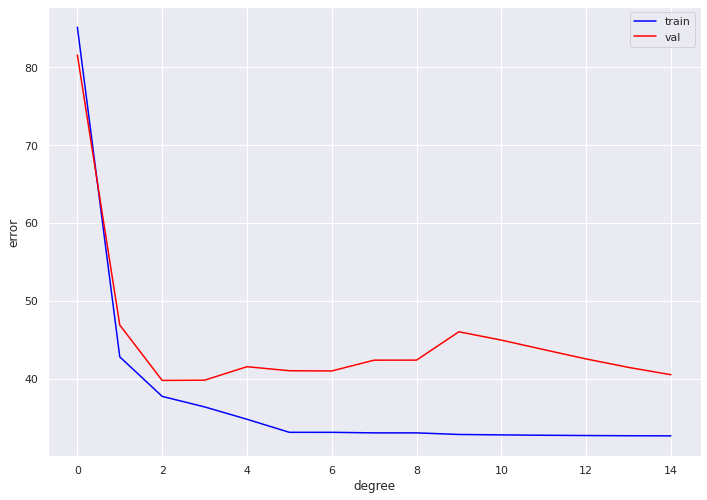

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

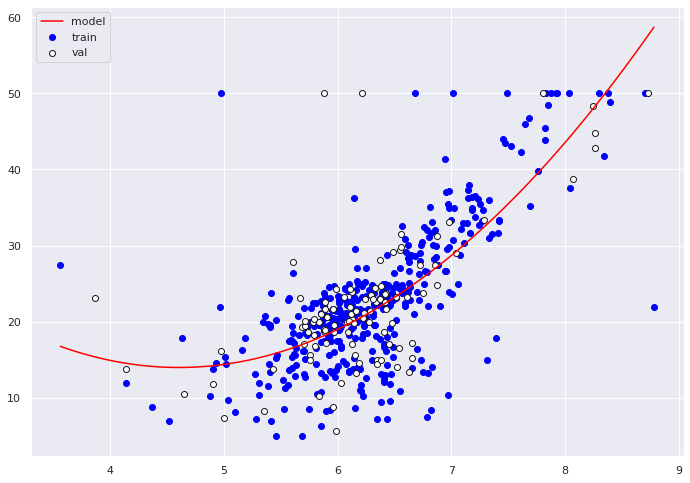

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
#De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 2:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

Como se ve en el grafico de error para un grado de libertad igual a 2 se obtiene el menor error cuadratico medio.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'DIS') | (boston['feature_names'] == 'CRIM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
y_train.shape

(404,)

In [ ]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train_fs,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test_fs)
y_prediction

array([24.20671963, 19.52648318, 24.11607851,  7.53974337, 23.30181343,
       19.61278754, 18.64480604, 20.99925831, 11.20373134, 24.20838491,
       -1.95531828, 21.92038844, 21.68718282,  1.65500434, 35.50655367,
       30.8491506 , 21.28693575, 32.83828652, 25.55625873, 19.787201  ,
       24.81865489, 19.02004058, 21.72902478, 25.23321398, 18.58780081,
       -1.79378809, 20.55428881, 17.43595362, 38.63327978, 21.49868959,
       19.1857393 , 19.45683924, 23.89526113, 22.41501232, 24.32826357,
       17.67672267, 12.89081928, 16.89564489, 21.07723836, 20.15649148,
       22.50723028, 19.47118731, 22.74747994, 13.42579113, 26.22563376,
       24.91467589, 19.79513781, 21.2746257 , 10.29707563, 26.99775415,
       20.82987908, 17.96305503, 20.70910775, 41.40397404, 18.36342237,
       20.45887007, 19.17735572, 21.12434284,  3.00988707, 20.68558874,
       21.61061352, 21.93002766, 29.80400742, 25.54911144, 14.44285465,
       25.94784344, 24.68942282, 24.7907544 , 23.45530883, 20.12

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.38018365091264206
mean_sqrd_error is== 50.47067781122881
root_mean_squared error of is== 7.104271800207873


In [ ]:
import pandas
coeff_df = LR.coef_
coeff_df
#un incremento unitario en las variables RM, DIS , o CRIM, provoca un crecimiento en el precio en kUSD de respectivamente:

array([-0.30189188,  8.54327449,  0.2258846 ])

Como se puede ver con el agregado de mas atributos se obtiene una disminución del error cuadratico medio.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [ ]:
#6  - Utilizando todos los atributos de entrada:
selector = (boston['feature_names'] == 'CRIM')| (boston['feature_names'] == 'ZN') | (boston['feature_names'] == 'INDUS') | (boston['feature_names'] == 'CHAS') |\
          (boston['feature_names'] == 'NOX') | (boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') | (boston['feature_names'] == 'RAD') | \
          (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'PTRATIO') |   (boston['feature_names'] == 'B') |  (boston['feature_names'] == 'LSTAT')
X_train_all_feats = X_train[:, selector]
X_test_all_feats = X_test[:, selector]
X_train_all_feats.shape, X_test_all_feats.shape, y_train.shape

((404, 12), (102, 12), (404,))

In [ ]:
# creating an object of LinearRegression class
LRM = LinearRegression()
# fitting the training data
LRM.fit(X_train_all_feats,y_train)

LinearRegression()

In [ ]:
y_prediction =  LRM.predict(X_test_all_feats)
y_prediction

array([24.53153241, 25.72306512, 30.40267177, 14.48343196, 20.5916331 ,
       20.65004582, 21.62701009, 22.61520538, 23.1019683 , 20.73434223,
        6.69293091, 14.98225845, 16.04497893,  8.63243247, 37.85671905,
       31.70176407, 22.84314418, 36.35160283, 31.35908186, 24.89405941,
       24.69228595, 26.84502547, 20.83691036, 31.17834199, 24.2162567 ,
       20.68169967, 18.13031248, 19.78573747, 31.31801281, 21.02621192,
       18.04854032, 17.87182604, 20.50761586, 25.31980275, 30.46189123,
       21.05441475,  9.59880425, 28.09643613, 17.57333761, 14.16934696,
       26.25806022, 21.3196338 , 22.40398522, 18.1937591 , 21.96863012,
       25.36497457, 20.33105891, 23.14405188, 10.97872724, 23.09100691,
       21.5268601 , 17.05487527, 26.28513188, 22.64320382, 13.63519968,
       21.89764764, 22.1141439 , 15.27416335, 19.04345355, 22.88172929,
       18.75157385, 21.4335631 , 31.99336683, 31.67820022, 19.01398791,
       34.22811725, 16.46173401, 17.98999573, 16.84327443, 23.38

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5251737706543531
mean_sqrd_error is== 38.664358681263415
root_mean_squared error of is== 6.218067117783742


In [ ]:
#Coeficientes del estimador
import pandas
coeff_df = LRM.coef_
for feat, coef in zip(list(boston['feature_names']), coeff_df):
  print(f"Coeficiente {feat} : {float(coef):.3f}")
#un incremento unitario en las variables A, B , etc..., provoca un crecimiento en el precio en kUSD de respectivamente:

Coeficiente CRIM: -0.111
Coeficiente ZN: 0.068
Coeficiente INDUS: -0.042
Coeficiente CHAS: 2.741
Coeficiente NOX: -19.490
Coeficiente RM: 0.019
Coeficiente AGE: -1.675
Coeficiente DIS: 0.330
Coeficiente RAD: -0.013
Coeficiente TAX: -1.214
Coeficiente PTRATIO: 0.005
Coeficiente B: -0.732


In [ ]:
for idx in list(boston['feature_names']):
  print(f"Coeficiente {idx}")

Coeficiente CRIM
Coeficiente ZN
Coeficiente INDUS
Coeficiente CHAS
Coeficiente NOX
Coeficiente RM
Coeficiente AGE
Coeficiente DIS
Coeficiente RAD
Coeficiente TAX
Coeficiente PTRATIO
Coeficiente B
Coeficiente LSTAT


### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?